## Support Vector Regressor

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import make_regression
X,y = make_regression(n_samples=1000, n_features=2, n_targets=1, noise=3.0)

In [4]:
X

array([[-0.07005573, -0.07053327],
       [ 1.82302607, -0.10803528],
       [ 0.04703825,  1.2694459 ],
       ...,
       [-0.31565838, -0.44731217],
       [-1.40562614, -0.36104317],
       [-1.46372054,  1.42191765]])

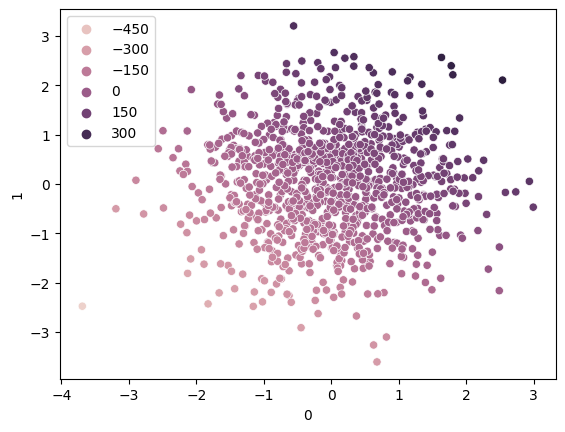

In [9]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)
plt.show()

In [10]:
# Train, Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42, shuffle=True)

In [17]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
parmameters = {
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['linear'],
    'epsilon':[0.1,0.2,0,3]
}
clf = GridSearchCV(SVR(), param_grid=parmameters, refit=True, cv=5, verbose=3)

In [18]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.668 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.662 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.665 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.664 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.668 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.662 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.684 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.665 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.664 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamm

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0, 3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [19]:
clf.best_params_

{'C': 1000, 'epsilon': 3, 'gamma': 1, 'kernel': 'linear'}

In [20]:
clf.best_score_

0.9994169656917385

In [22]:
# Make Model
from sklearn.svm import SVR
svr = SVR(C= 1000, epsilon= 3, gamma= 1, kernel= 'linear')

In [23]:
svr.fit(X_train, y_train)

SVR(C=1000, epsilon=3, gamma=1, kernel='linear')

In [24]:
svr.coef_

array([[75.78108536, 93.87829678]])

In [25]:
y_pred = svr.predict(X_test)

In [26]:
# Accuracy
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.9993723709886466
